In [1]:
import datetime

import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
from access import Access, weights, Datasets
from typing import List
import os
from pathlib import Path
import pickle
import re
import shapely
from mpl_toolkits.axes_grid1 import make_axes_locatable
import igraph as ig
from tqdm import tqdm
from scipy import stats
from inequality.theil import TheilD

import matplotlib
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

from matplotlib import pyplot as plt
from copy import copy
pd.options.mode.chained_assignment = None

In [2]:
complete_stats = pd.read_csv("/home/rico/Documents/thesis/eda/notebooks/results/complete_stats.csv")
complete_stats.date = pd.to_datetime(complete_stats.date)
complete_stats.head()

,Unnamed: 0,date,metric,BU03630000,BU03630001,BU03630002,BU03630003,BU03630004,BU03630100,BU03630101,...,BU03639605,BU03639606,BU03639700,BU03639701,BU03639702,BU03639703,BU03639800,BU03639801,BU03631003,BU03631005
0,0,2019-12-02,avg_tt,20.410498,19.071897,18.919578,18.643491,19.401408,21.731384,20.100457,...,30.997208,32.091736,33.878734,31.969534,34.870108,31.80899,36.475384,40.379053,NaN,NaN
1,1,2019-12-02,avg_modes,3.338148,3.232143,3.270709,3.371674,3.371674,2.000000,3.240409,...,3.470187,3.449744,3.470137,3.460426,3.470137,3.46167,3.496593,3.496593,NaN,NaN
2,2,2019-12-02,avg_lines,4.327952,3.593537,4.214347,3.944206,3.944206,2.125000,4.058824,...,6.068143,6.027257,5.971843,5.987234,5.971843,5.98552,5.545145,5.545145,NaN,NaN
3,3,2019-12-02,avg_hops,11.870008,10.694728,11.321093,10.561373,10.561373,5.312500,11.230179,...,20.055366,20.991482,24.996587,22.644255,24.996587,23.45230,19.701874,19.701874,NaN,NaN
4,4,2019-12-02,thr_15min_pois,253.000000,317.000000,353.000000,373.000000,317.000000,4.000000,248.000000,...,62.000000,50.000000,52.000000,58.000000,46.000000,59.00000,27.000000,8.000000,NaN,NaN


In [3]:
base_stats_2019 = complete_stats[complete_stats.date == complete_stats.date[complete_stats.date > datetime.datetime(2019,1,1)].min()]
base_stats_2020 = complete_stats[complete_stats.date == complete_stats.date[complete_stats.date > datetime.datetime(2020,1,1)].min()]
base_stats_2021 = complete_stats[complete_stats.date == complete_stats.date[complete_stats.date > datetime.datetime(2021,1,1)].min()]

In [4]:
ams_nb = gpd.read_file('/home/rico/Documents/thesis/eda/notebooks/sample_data/amsterdam/ams-neighbourhoods.geojson')
ams_nb.head()

,BU_CODE,BU_NAAM,cent_x,cent_y,res_cent_x,res_cent_y,geometry
0,BU03630000,Kop Zeedijk,4.900261,52.375930,4.900089,52.375523,"POLYGON ((4.90096 52.37724, 4.90195 52.37724, ..."
1,BU03630001,Oude Kerk e.o.,4.896141,52.373791,4.896776,52.373752,"POLYGON ((4.89651 52.37575, 4.89707 52.37550, ..."
2,BU03630002,Burgwallen Oost,4.898736,52.372818,4.898751,52.372833,"POLYGON ((4.89966 52.37468, 4.90002 52.37455, ..."
3,BU03630003,Nes e.o.,4.893710,52.370860,4.894227,52.370942,"POLYGON ((4.89301 52.37271, 4.89331 52.37264, ..."
4,BU03630004,BG-terrein e.o.,4.895579,52.369540,4.895882,52.369991,"POLYGON ((4.89613 52.37177, 4.89670 52.37157, ..."


In [5]:
# def get_metric_gdf(metric: pd.Series):
metric = base_stats_2019[base_stats_2019.metric=='avg_tt']
metric = metric.reset_index(drop=True)
metric = metric.T
metric = metric.drop(labels=['Unnamed: 0', 'date', 'metric'])
metric = metric.reset_index()
metric['BU_CODE'] = metric['index']
del metric['index']
gdf = gpd.pd.merge(ams_nb, metric, on='BU_CODE')
gdf['metric'] = gdf[0]
del gdf[0]

/home/rico/anaconda3/envs/thesis/lib/python3.9/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


<AxesSubplot:>

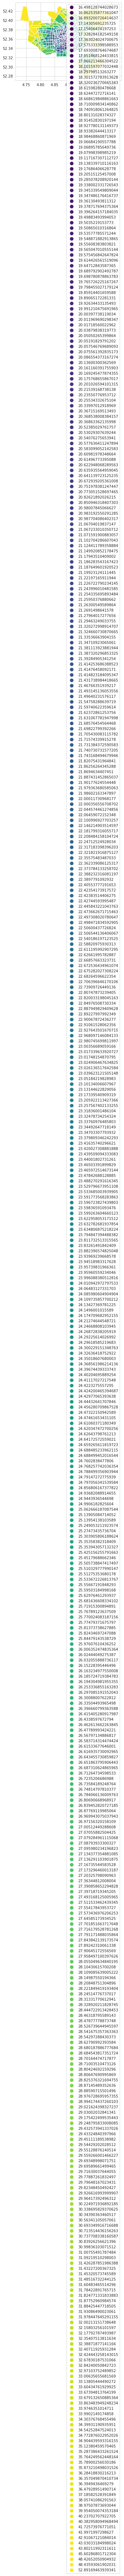

In [6]:
# gdf.plot('metric', legend=True, cmap='viridis')
gdf.plot(column='metric', cmap='viridis', legend=True)

In [7]:
buurt_avg_tt_2019 = base_stats_2019[base_stats_2019.metric=='avg_tt']
buurt_avg_tt_2020 =
buurt_avg_tt_2021 =

buurt_avg_hops_2019 =
buurt_avg_hops_2020 =
buurt_avg_hops_2021 =

buurt_15min_pois_2019 =
buurt_15min_pois_2020 =
buurt_15min_pois_2021 =

SyntaxError: invalid syntax (<ipython-input-7-7e03e5f0d3a9>, line 2)

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(10, 20))

# divider = make_axes_locatable(ax[0])
# cax = divider.append_axes("right", size="5%", pad=-1.2)
buurt_avg_tt.plot(0, ax=ax[0], legend=True)  #, legend_kwds={'cax':cax})
ax[0].set_title("Avg. travel time")
ax[0].set_xticks([])
ax[0].set_yticks([])

# divider = make_axes_locatable(ax[1])
# cax = divider.append_axes("right", size="5%", pad=-1.2)
buurt_avg_hops.plot(0, ax=ax[1], legend=True)  #, legend_kwds={'cax':cax})
ax[1].set_title("Avg. hops")
ax[1].set_xticks([])
ax[1].set_yticks([])

# divider = make_axes_locatable(ax[2])
# cax = divider.append_axes("right", size="5%", pad=-1.2)
buurt_15min_pois.plot(0, ax=ax[2], legend=True, cmap='viridis')  #, legend_kwds={'cax':cax})
ax[2].set_title("Avg. COM - 15 min threshold")
ax[2].set_xticks([])
ax[2].set_yticks([])
# fig.tight_layout()
plt.savefig('/home/rico/Documents/thesis/eda/notebooks/plots/amsterdam_accessibility_analysis/travel_metrics_2019.png')